In [1]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# API Key
from config import apikey

In [ ]:
#https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo
base_url = "https://www.alphavantage.co/query?"
params = {
    "function":"TIME_SERIES_WEEKLY",
    "symbol":"",   #REMOVE AFTER VERIFYING
    "apikey":apikey
}

# Read in the stock data set
#stock_data = pd.read_csv('Resources/Stocks.csv')
#stock_data.head()


#function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo

In [2]:
#Using this code after the csv was created
stock_data = pd.read_csv('500_stock_export.csv')
stock_data.head()

,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13
0,0,MMM,3M Company,Industrials,155.82,158.10,163.10,166.09,170.09,173.15,...,180.47,181.35,178.15,158.66,160.08,161.01,156.93,149.24,153.65,141.68
1,1,AOS,A.O. Smith Corp,Industrials,45.51,47.99,51.01,51.07,50.28,52.08,...,47.62,46.93,45.43,42.69,41.99,43.93,44.09,39.55,42.69,41.49
2,2,ABT,Abbott Laboratories,Health Care,81.99,79.63,82.79,81.65,82.66,83.74,...,85.36,89.00,90.40,87.14,87.87,89.66,87.45,77.03,81.74,81.65
3,3,ABBV,AbbVie Inc.,Health Care,74.66,73.63,76.46,76.53,81.75,85.21,...,89.06,88.00,83.54,81.02,92.29,94.05,94.96,85.71,88.82,85.37
4,4,ACN,Accenture plc,Information Technology,189.64,184.97,187.08,183.07,188.22,189.70,...,207.66,209.20,208.57,205.21,211.58,212.37,211.89,180.59,178.75,166.51


In [ ]:
#Implement the weeks we will want to add to the columns

Start_Week = "2019-10-04"
End_Week = "2020-03-13"
x= Start_Week
weeks = []

In [3]:
hardcode_weeks = ["2019-10-04", "2019-10-11","2019-10-18", "2019-10-25", "2019-11-01", "2019-11-08",
                  "2019-11-15", "2019-11-22", "2019-11-29", "2019-12-06", "2019-12-13", "2019-12-20",
                  "2019-12-27", "2020-01-03", "2020-01-10", "2020-01-17", "2020-01-24", "2020-01-31",
                  "2020-02-07", "2020-02-14", "2020-02-21", "2020-02-28", "2020-03-06", "2020-03-13"]

In [ ]:
hardcode_weeks[0]

In [ ]:
for item in hardcode_weeks:
    stock_data[item]=""

In [3]:
stock_data

,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13
0,0,MMM,3M Company,Industrials,155.82,158.10,163.10,166.09,170.09,173.15,...,180.47,181.35,178.15,158.66,160.08,161.01,156.93,149.24,153.65,141.68
1,1,AOS,A.O. Smith Corp,Industrials,45.51,47.99,51.01,51.07,50.28,52.08,...,47.62,46.93,45.43,42.69,41.99,43.93,44.09,39.55,42.69,41.49
2,2,ABT,Abbott Laboratories,Health Care,81.99,79.63,82.79,81.65,82.66,83.74,...,85.36,89.00,90.40,87.14,87.87,89.66,87.45,77.03,81.74,81.65
3,3,ABBV,AbbVie Inc.,Health Care,74.66,73.63,76.46,76.53,81.75,85.21,...,89.06,88.00,83.54,81.02,92.29,94.05,94.96,85.71,88.82,85.37
4,4,ACN,Accenture plc,Information Technology,189.64,184.97,187.08,183.07,188.22,189.70,...,207.66,209.20,208.57,205.21,211.58,212.37,211.89,180.59,178.75,166.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,500,XYL,Xylem Inc.,Industrials,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,501,YUM,Yum! Brands Inc,Consumer Discretionary,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,502,ZBH,Zimmer Biomet Holdings,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,503,ZION,Zions Bancorp,Financials,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for index, row in stock_data[95:100].iterrows():
    params['symbol']=row["Symbol"]
    response = requests.get(base_url, params=params).json()
    
    for week in hardcode_weeks: 
        try:
            stock_data.loc[index,week]= response["Weekly Time Series"][week]["4. close"]
        except:
            pass
            
        
stock_data.to_csv("stock_export.csv",index=False)

In [4]:
stock_data[50:150]

,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13
50,50,AIV,Apartment Investment & Management,Real Estate,53.32,53.55,54.48,54.29,55.23,53.17,...,51.52,52.75,54.02,52.71,53.37,54.80,55.49,47.84,49.81,46.05
51,51,AAPL,Apple Inc.,Information Technology,227.01,236.21,236.41,246.58,255.82,260.14,...,310.33,318.73,318.31,309.51,320.03,324.95,313.05,273.36,289.03,277.97
52,52,AMAT,Applied Materials Inc.,Information Technology,50.88,51.75,51.68,55.72,55.46,56.03,...,61.47,62.85,62.00,57.99,61.71,66.85,64.27,58.12,57.79,50.89
53,53,APTV,Aptiv Plc,Consumer Discretionary,83.43,86.26,88.96,89.58,92.35,96.88,...,89.51,91.53,91.54,84.79,87.13,88.32,90.07,78.11,76.29,66.47
54,54,ADM,Archer-Daniels-Midland Co,Consumer Staples,40.35,40.46,39.64,41.01,42.43,43.31,...,43.95,45.25,44.30,44.76,45.71,44.77,43.90,37.65,37.64,34.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,DLR,Digital Realty Trust Inc,Real Estate,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,146,DFS,Discover Financial Services,Financials,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,147,DISCA,Discovery Inc. Class A,Consumer Discretionary,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,148,DISCK,Discovery Inc. Class C,Consumer Discretionary,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
edit_df = stock_data.copy()

In [5]:
edit_df.replace('', np.nan, inplace=True)

In [6]:
edit_df.dropna(how="any", inplace = True)

In [7]:
edit_df["Difference"] = edit_df[hardcode_weeks[0]]-edit_df[hardcode_weeks[-1]]

In [8]:
edit_df

,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
0,0,MMM,3M Company,Industrials,155.82,158.10,163.10,166.09,170.090,173.15,...,181.35,178.15,158.66,160.08,161.01,156.93,149.24,153.65,141.68,14.14
1,1,AOS,A.O. Smith Corp,Industrials,45.51,47.99,51.01,51.07,50.280,52.08,...,46.93,45.43,42.69,41.99,43.93,44.09,39.55,42.69,41.49,4.02
2,2,ABT,Abbott Laboratories,Health Care,81.99,79.63,82.79,81.65,82.660,83.74,...,89.00,90.40,87.14,87.87,89.66,87.45,77.03,81.74,81.65,0.34
3,3,ABBV,AbbVie Inc.,Health Care,74.66,73.63,76.46,76.53,81.750,85.21,...,88.00,83.54,81.02,92.29,94.05,94.96,85.71,88.82,85.37,-10.71
4,4,ACN,Accenture plc,Information Technology,189.64,184.97,187.08,183.07,188.220,189.70,...,209.20,208.57,205.21,211.58,212.37,211.89,180.59,178.75,166.51,23.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,500,XYL,Xylem Inc.,Industrials,75.97,77.63,79.78,83.30,79.120,77.33,...,83.46,81.48,81.66,84.20,88.14,88.52,77.34,81.22,72.12,3.85
462,501,YUM,Yum! Brands Inc,Consumer Discretionary,114.66,114.45,112.30,109.10,99.650,98.90,...,105.40,104.98,105.77,102.04,105.28,103.51,89.25,89.40,78.46,36.20
463,502,ZBH,Zimmer Biomet Holdings,Health Care,134.45,136.44,137.61,134.07,138.220,144.00,...,149.38,147.80,147.90,156.39,160.40,157.39,136.15,124.10,97.80,36.65
464,503,ZION,Zions Bancorp,Financials,43.20,44.09,44.72,47.95,49.345,51.07,...,50.74,46.63,45.49,46.23,46.26,45.43,39.95,35.28,29.42,13.78


In [9]:
edit_df.to_csv("500_stock_export.csv",index=False)

In [10]:
sector_df = edit_df.copy()

In [11]:
sector_df = sector_df.drop(["Symbol","Name","Unnamed: 0"], axis=1)
sector_df = sector_df.set_index(["Sector"])
sector_df

,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,2019-12-06,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
Sector,,,,,,,,,,,,,,,,,,,,,
Industrials,155.82,158.10,163.10,166.09,170.090,173.15,171.88,167.60,169.77,171.47,...,181.35,178.15,158.66,160.08,161.01,156.93,149.24,153.65,141.68,14.14
Industrials,45.51,47.99,51.01,51.07,50.280,52.08,50.78,48.20,48.40,46.79,...,46.93,45.43,42.69,41.99,43.93,44.09,39.55,42.69,41.49,4.02
Health Care,81.99,79.63,82.79,81.65,82.660,83.74,85.71,83.74,85.45,85.48,...,89.00,90.40,87.14,87.87,89.66,87.45,77.03,81.74,81.65,0.34
Health Care,74.66,73.63,76.46,76.53,81.750,85.21,88.63,86.05,87.73,86.98,...,88.00,83.54,81.02,92.29,94.05,94.96,85.71,88.82,85.37,-10.71
Information Technology,189.64,184.97,187.08,183.07,188.220,189.70,196.81,196.66,201.16,202.55,...,209.20,208.57,205.21,211.58,212.37,211.89,180.59,178.75,166.51,23.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Industrials,75.97,77.63,79.78,83.30,79.120,77.33,77.55,76.89,77.51,75.32,...,83.46,81.48,81.66,84.20,88.14,88.52,77.34,81.22,72.12,3.85
Consumer Discretionary,114.66,114.45,112.30,109.10,99.650,98.90,98.28,97.62,100.67,98.77,...,105.40,104.98,105.77,102.04,105.28,103.51,89.25,89.40,78.46,36.20
Health Care,134.45,136.44,137.61,134.07,138.220,144.00,146.78,143.82,145.28,148.53,...,149.38,147.80,147.90,156.39,160.40,157.39,136.15,124.10,97.80,36.65


In [12]:
sector_df[hardcode_weeks]= sector_df[hardcode_weeks].apply(pd.to_numeric, errors = "coerce")

In [13]:
sector_df = sector_df.groupby(["Sector"]).mean()

In [14]:
sector_df

,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,2019-12-06,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
Sector,,,,,,,,,,,,,,,,,,,,,
Consumer Discretionary,150.975779,152.346623,154.383571,155.682468,156.319610,154.446039,153.821948,153.502597,156.032727,156.328571,...,163.047078,159.644675,156.404481,159.324675,163.335455,161.617273,143.750649,140.200130,124.656039,26.319740
Consumer Staples,92.192167,91.533667,91.195833,90.782000,90.512667,90.793333,91.333333,91.538333,92.429333,93.057833,...,95.707667,95.204500,93.748000,95.787500,96.808333,96.178667,85.963000,91.549000,83.497333,8.694833
Energy,46.462593,47.197778,46.100741,48.623333,48.590000,49.938148,49.339259,48.618148,47.780741,48.567407,...,51.454074,48.728519,45.801852,46.324074,46.590000,46.731481,39.348519,35.187407,25.294074,21.168519
Financials,92.388333,92.811905,93.571905,94.597302,96.402143,98.492698,98.666349,98.798889,99.663651,100.096667,...,103.739683,102.195873,101.173016,104.230635,105.766667,104.361270,89.908095,87.252381,77.146984,15.241349
Health Care,155.743909,155.795818,159.419000,160.992273,165.174000,165.438364,169.808273,171.283818,173.360545,175.027636,...,184.018545,180.328545,172.708182,179.960182,183.956182,183.118909,164.644727,170.859636,156.790364,-1.046455
Industrials,123.872109,125.941797,126.794375,129.086953,130.892656,132.775625,133.845000,133.004609,133.615938,132.783203,...,139.756094,138.620469,134.233750,137.693438,139.265312,137.736719,121.281250,119.519375,104.808281,19.063828
Information Technology,147.868881,149.027015,148.894179,151.500522,153.646119,156.361791,158.810746,156.718358,159.281045,159.450448,...,174.562687,174.548358,168.712836,174.194627,179.186567,175.416119,157.667910,155.551940,144.333955,3.534925
Materials,112.417273,114.131818,114.520000,116.207273,117.130455,118.960909,119.634545,117.525455,119.311364,119.506818,...,121.295455,119.685455,115.970455,120.777727,120.953182,119.479091,105.575909,108.830909,95.765909,16.651364
Real Estate,122.095312,121.188750,122.807813,121.790313,120.881562,116.390625,118.725000,117.303750,118.856250,118.557187,...,121.672812,122.815781,121.121875,123.436875,129.334688,129.368437,113.829688,119.804688,111.363750,10.731562


In [15]:
sector_df.to_csv("500_bysector_export.csv",index=False)

In [107]:
#sector_df = sector_df.T

In [16]:
sector_df

,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,2019-12-06,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
Sector,,,,,,,,,,,,,,,,,,,,,
Consumer Discretionary,150.975779,152.346623,154.383571,155.682468,156.319610,154.446039,153.821948,153.502597,156.032727,156.328571,...,163.047078,159.644675,156.404481,159.324675,163.335455,161.617273,143.750649,140.200130,124.656039,26.319740
Consumer Staples,92.192167,91.533667,91.195833,90.782000,90.512667,90.793333,91.333333,91.538333,92.429333,93.057833,...,95.707667,95.204500,93.748000,95.787500,96.808333,96.178667,85.963000,91.549000,83.497333,8.694833
Energy,46.462593,47.197778,46.100741,48.623333,48.590000,49.938148,49.339259,48.618148,47.780741,48.567407,...,51.454074,48.728519,45.801852,46.324074,46.590000,46.731481,39.348519,35.187407,25.294074,21.168519
Financials,92.388333,92.811905,93.571905,94.597302,96.402143,98.492698,98.666349,98.798889,99.663651,100.096667,...,103.739683,102.195873,101.173016,104.230635,105.766667,104.361270,89.908095,87.252381,77.146984,15.241349
Health Care,155.743909,155.795818,159.419000,160.992273,165.174000,165.438364,169.808273,171.283818,173.360545,175.027636,...,184.018545,180.328545,172.708182,179.960182,183.956182,183.118909,164.644727,170.859636,156.790364,-1.046455
Industrials,123.872109,125.941797,126.794375,129.086953,130.892656,132.775625,133.845000,133.004609,133.615938,132.783203,...,139.756094,138.620469,134.233750,137.693438,139.265312,137.736719,121.281250,119.519375,104.808281,19.063828
Information Technology,147.868881,149.027015,148.894179,151.500522,153.646119,156.361791,158.810746,156.718358,159.281045,159.450448,...,174.562687,174.548358,168.712836,174.194627,179.186567,175.416119,157.667910,155.551940,144.333955,3.534925
Materials,112.417273,114.131818,114.520000,116.207273,117.130455,118.960909,119.634545,117.525455,119.311364,119.506818,...,121.295455,119.685455,115.970455,120.777727,120.953182,119.479091,105.575909,108.830909,95.765909,16.651364
Real Estate,122.095312,121.188750,122.807813,121.790313,120.881562,116.390625,118.725000,117.303750,118.856250,118.557187,...,121.672812,122.815781,121.121875,123.436875,129.334688,129.368437,113.829688,119.804688,111.363750,10.731562


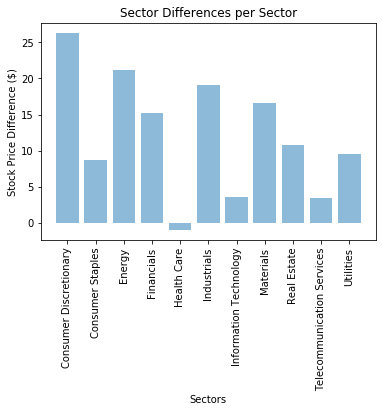

In [18]:
x=sector_df.index
y=sector_df["Difference"]

plt.bar(x, y, align='center', alpha=0.5)
plt.title("Sector Differences per Sector")
plt.xlabel("Sectors")
plt.ylabel("Stock Price Difference ($)")
plt.xticks(rotation=90)
plt.savefig('Sector_Difference.png')

plt.show()